In [1]:
import numpy as np
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error,r2_score
import pandas as pd
import matplotlib.pyplot as plt

/Users/liudawei/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/liudawei/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/liudawei/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/liudawei/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/liudawei/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future 

In [2]:
# 数据准备
raw_data = np.loadtxt('regression.txt')
X = raw_data[:, :-1]
y = raw_data[:,-1]
print(X[:2])
print(y[:2])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]
[24.  21.6]


In [3]:
#训练回归模型
n_folds = 6 #设置交叉校验的次数
model_br = BayesianRidge()
model_lr = LinearRegression()
model_etc = ElasticNet()
model_svr = SVR()
model_gbr = GradientBoostingRegressor()
model_names = ['BayesianRidge','LinearRegression','ElasticNet','SVR','GradientBoostingRegressor']
model_dic = [model_br,model_lr,model_etc,model_svr,model_gbr]
cv_score_list = []
pre_y_list = []
for model in model_dic:
    scores = cross_val_score(model,X,y,cv=n_folds)
    cv_score_list.append(scores)
    pre_y_list.append(model.fit(X,y).predict(X))

In [4]:
#模型效果指标评估
n_samples,n_features = X.shape
model_metrics_name = [explained_variance_score,mean_absolute_error,mean_squared_error,r2_score]
model_metrics_list = []
for i in range(5):
    tmp_list = []
    for m in model_metrics_name:
        tmp_score = m(y,pre_y_list[i])
        tmp_list.append(tmp_score)
    model_metrics_list.append(tmp_list)
df1 = pd.DataFrame(cv_score_list, index=model_names)
df2 = pd.DataFrame(model_metrics_list,index=model_names,columns=['env','mae','mse','r2'])
print('samples: %d \t features: %d'%(n_samples,n_features))
print(70 * '-')
print('cross validation result:')
print(df1)
print(70 * '-')
print('regression metrics:')
print(df2)
print(70 * '-')
print('short name \t full name')
print('ev \t explained_variance')
print('mae \t mean_absolute_error')
print('mse \t mean_squared_error')
print('r2 \t r2')
print(70 * '-')

samples: 506 	 features: 13
----------------------------------------------------------------------
cross validation result:
                                  0         1         2         3         4  \
BayesianRidge              0.662422  0.677079  0.549702  0.776896 -0.139738   
LinearRegression           0.642240  0.611521  0.514471  0.785033 -0.143673   
ElasticNet                 0.582476  0.603773  0.365912  0.625645  0.437122   
SVR                       -0.000799 -0.004447 -1.224386 -0.663773 -0.122252   
GradientBoostingRegressor  0.751162  0.808991  0.768933  0.859232  0.376134   

                                  5  
BayesianRidge             -0.024448  
LinearRegression          -0.015390  
ElasticNet                 0.200454  
SVR                       -1.374062  
GradientBoostingRegressor  0.548048  
----------------------------------------------------------------------
regression metrics:
                                env       mae        mse        r2
BayesianRidge  

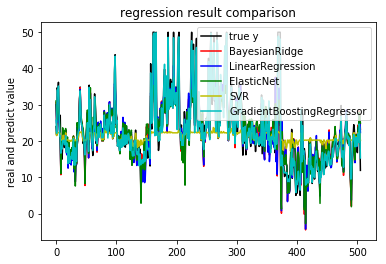

In [5]:
#模型可视化
plt.figure()
plt.plot(np.arange(X.shape[0]),y,color='k',label='true y')
color_list = ['r','b','g','y','c']
linestyle_list = ['-','.','o','v','*']
for i,pre_y in enumerate(pre_y_list):
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])
    plt.title('regression result comparison')
    plt.legend(loc='upper right')
    plt.ylabel('real and predict value')
plt.show()    

In [12]:
#模型应用
print('regression predict')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i,new_point in enumerate(new_point_set):
    new_pre_y = model_gbr.predict([new_point])
    print('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

regression predict
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16
